bonus Q
1. yes
2. sigma^2 /n

**Example. sampling dis of the linear regression OLS estimators**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

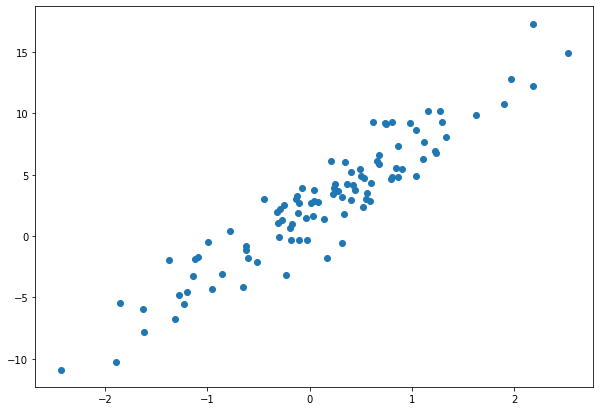

In [6]:
plt.rcParams['figure.figsize'] = (10,7)

#set seed
np.random.seed(1)

#hyperparameters (parameters of your method, things that you set)
n = 100

#true parameters (we dont know this)
mu, sigma = 0, 2
b0 = 2
b1 = 5

#generate data
e = np.random.normal(mu, sigma, size=n)
x = np.random.normal(0, 1, size=n) #doesnt have to be normal, could be any dist
y = b0 + b1*x + e

plt.scatter(x, y)
plt.show()

..........


very cool. Now, lets calculate our estimates

In [10]:
x_bar = np.mean(x)
y_bar = np.mean(y)

beta1_hat = sum((x - x_bar)*(y - y_bar))/sum((x - x_bar)**2)
beta0_hat = y_bar - beta1_hat*x_bar
sigma2_hat = sum((y - (beta0_hat + beta1_hat*x))**2) / n

print(f'beta1_hat: {beta1_hat}')
print(f'beta0_hat: {beta0_hat}')
print(f'sigma_hat: {np.sqrt(sigma2_hat)}')

beta1_hat: 5.172153051400498
beta0_hat: 2.0948616169460195
sigma_hat: 1.7630267304540486


verify using a library sklearn

In [12]:
x.shape #need to reshape into  2 dimensions for sklearn to accept

(100,)

In [14]:
x.reshape(-1, 1).shape #acceptable

(100, 1)

In [13]:
y.shape

(100,)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x.reshape(-1, 1), y)
y_hat = model.predict(x.reshape(-1, 1))
resid = y - y_hat #true value - forecasted

print(f'beta1_hat = {model.coef_[0]}')
print(f'beta0_hat = {model.intercept_}')
print(f'sigma_hat = {np.std(resid)}')

beta1_hat = 5.172153051400498
beta0_hat = 2.0948616169460195
sigma_hat = 1.7630267304540486


since we can generate new samples at will, we can improve our estimates by increasing the sample size to some arbitrarily large numers. <br> Now lets try to estimate the smapling dist of our estimates for some **fixed sample size**

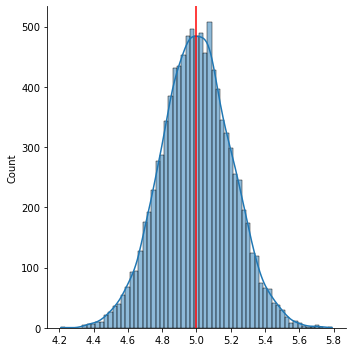

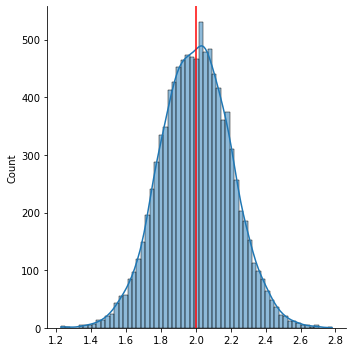

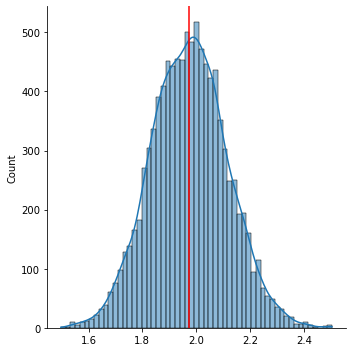

In [24]:
import seaborn as sns

#sample size
n = 100

# sim size
sim_size = 10_000 # im going to simulate 100 samples 10k times

# estimate sampling dist
# put my estimates here
beta1_hat_vec = []
beta0_hat_vec = []
sigma2_hat_vec = []

for i in range(sim_size):
    
    # generate 100 new data points
    e = np.random.normal(mu, sigma, n)
    x = np.random.normal(0, 1, n)
    y = b0 + b1*x + e
    
    # estimate the parameters
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    beta1_hat = sum((x - x_bar)*(y - y_bar))/sum((x - x_bar)**2)
    beta0_hat = y_bar - beta1_hat*x_bar
    sigma2_hat = sum((y - (beta0_hat + beta1_hat*x))**2) / n
    
    beta1_hat_vec.append(beta1_hat)
    beta0_hat_vec.append(beta0_hat)
    sigma2_hat_vec.append(sigma2_hat)

sns.displot(beta1_hat_vec, kde=True, height=5, aspect=1) # EMPIRICAL DIST OF THE R.V., BETA1_HAT
plt.axvline(np.mean(beta1_hat_vec), c='red')
plt.show()

sns.displot(beta0_hat_vec, kde=True, height=5, aspect=1) # EMPIRICAL DIST OF THE R.V., BETA1_HAT
plt.axvline(np.mean(beta0_hat_vec), c='red')
plt.show()

sns.displot(np.sqrt(sigma2_hat_vec), kde=True, height=5, aspect=1) 
plt.axvline(np.mean(np.sqrt(sigma2_hat_vec)), c='red')
plt.show()

In [ ]:
# stats on sampling dist

# standard error is the standard deviation of the sampling distribution

we can also use the statsmodels package to calc the confidence intervals and other statistics of interest automatically

In [25]:
import statsmodel.api as sm

ModuleNotFoundError: No module named 'statsmodel'

In [26]:
!pip install statsmodel # open this notebook in google collab in the future 

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
